In [176]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import os
import tensorflow
from keras.layers import LeakyReLU

In [162]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [59]:
dataframe = pd.read_csv("Final_Dataset_120522.csv",index_col='Date',parse_dates=True)
dataframe['Speed']

Date
2001-01-02     2.30
2001-01-03     2.30
2001-01-04     9.20
2001-01-05     9.20
2001-01-06     9.20
              ...  
2022-04-10    12.65
2022-04-11    13.80
2022-04-12     9.20
2022-04-13    13.80
2022-04-14     6.90
Name: Speed, Length: 7984, dtype: float64

In [447]:
dataframe = pd.read_csv("Final_Dataset_120522.csv",index_col='Date',parse_dates=True)
dataset = dataframe.values
dataset = dataset.astype('float32')

# # normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# # split into train and test sets

train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# # reshape into X=t and Y=t+1

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

 
# # reshape input to be [samples, time steps, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


 
# # create and fit the LSTM network

In [448]:
model = Sequential()
model.add(LSTM(4,activation="linear",dropout=0.1,input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=2)

#dropout,Dense 1->5.

Epoch 1/100
1397/1397 - 2s - loss: 0.0026 - 2s/epoch - 1ms/step
Epoch 2/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 898us/step
Epoch 3/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 898us/step
Epoch 4/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 920us/step
Epoch 5/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 917us/step
Epoch 6/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 913us/step
Epoch 7/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 919us/step
Epoch 8/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 918us/step
Epoch 9/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 932us/step
Epoch 10/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 917us/step
Epoch 11/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 917us/step
Epoch 12/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 918us/step
Epoch 13/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 907us/step
Epoch 14/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 909us/step
Epoch 15/100
1397/1397 - 1s - loss: 0.0022 - 1s/epoch - 905us/step
Epoch 

In [451]:
# # make predictions
#model = bayes_opt_model_best_model[0]
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [452]:
trainY[0]

0.016949153

In [453]:
# # invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
 



In [454]:
# # calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.11 RMSE
Test Score: 3.22 RMSE


In [455]:

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # shift test predictions for plotting


In [456]:

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# # plot baseline and predictions


No handles with labels found to put in legend.


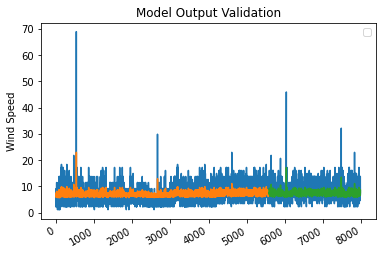

In [457]:
import numpy as np
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.gcf().autofmt_xdate()
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Model Output Validation')
plt.show()

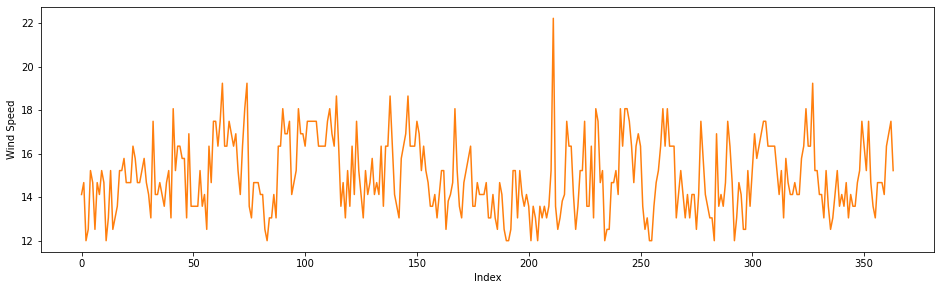

In [494]:
#plt.plot(scaler.inverse_transform(dataset[-365:]))
plt.plot(trainPredictPlot[-365:]*2)
plt.plot(testPredictPlot[-365:]*2)
plt.gcf().set_size_inches(16, 4.5)
plt.ylabel('Wind Speed')
plt.xlabel("Index")
plt.xscale("linear")
plt.show() #Predicted Plot

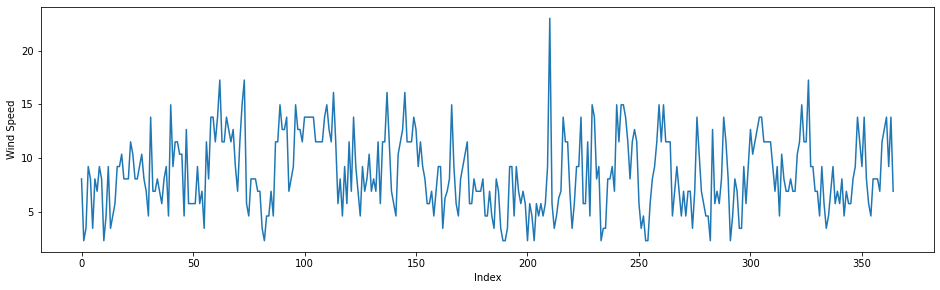

In [492]:
plt.plot(scaler.inverse_transform(dataset[-365:]))
plt.ylabel('Wind Speed')
plt.xlabel("Index")
plt.xscale("linear")
plt.gcf().set_size_inches(16, 4.5) #Actual Dataset

In [496]:
AC=(test_Y[0]/(test_Y[0]+testPredict[:,0]))*100
print("Accuracy Score:",sum(AC)/len(AC))

Accuracy Score: 52.00180744272927


In [463]:
AC=(trainY[0]/(trainY[0]+trainPredict[:,0]))*100
print("Accuracy Score:",sum(AC)/len(AC))

Accuracy Score: 47.982198822885024


# Future scope

In [403]:
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization

n_input = 1
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units',min_value=1,
                                    max_value=512,
                                    step=32), 
                input_shape=(n_input, 1)))
    model.add(Dense(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32)))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))
    return model



In [404]:
bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=5,
    executions_per_trial=2,
    directory=os.path.normpath('C:/keras_tuning'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)

bayesian_opt_tuner.search(trainX, trainY,epochs=32,validation_data=(testX, testY),
     validation_split=0.30,verbose=1)


bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models()


Trial 5 Complete [00h 00m 23s]
mse: 0.001958097913302481

Best mse So Far: 0.0019551882287487388
Total elapsed time: 00h 03m 39s
INFO:tensorflow:Oracle triggered exit


In [401]:
len(bayes_opt_model_best_model)

1